In [1]:
from math import pi
import pyJvsip as pjv
%matplotlib inline
from matplotlib.pyplot import *

#### Interpolation
To demonstrate interpolation we calculate a sine function with only eleven points between $0$ and $2\pi$. We then use spline to estimate a sine function with 251 points included. We compare against the actual function. 

We include some markers placed (approximately) at the spline node points. For the spline the estimate should agree exactly with the data at the node points.

After the spline function example we include the same example for interpolation using linear and nearest functions.

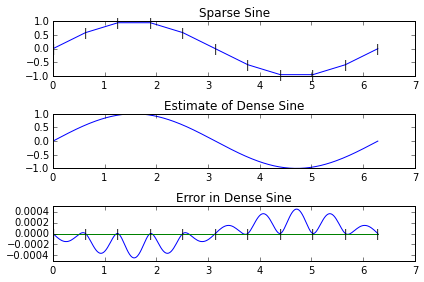

In [2]:
#make up some data for vector interpolation
x0=pjv.ramp('vview_d',0.0,2*pi/10,11)
y0=pjv.sin(x0,x0.empty)
#make up an interpolation vector and output
x=pjv.ramp('vview_d',0.0,2*pi/250,251)
yEstimate=x.empty
#interploate
spln=pjv.Spline(x0.type,400)
spln.interpolate(x0,y0,x,yEstimate)
#calculate actual
yActual=pjv.sin(x,x.empty)
#plot the data and save as pdf
subplot(3,1,1)
plot(x0.list,y0.list);title('Sparse Sine')
for i in range(x0.length):
    text(x0[i],y0[i],'|',verticalalignment='center',horizontalalignment='center')
subplot(3,1,2)
plot(x.list,yEstimate.list);title('Estimate of Dense Sine')
subplot(3,1,3)
plot(x.list,(yEstimate-yActual).list);title('Error in Dense Sine')
#plot zero line. There should be at least 11 zero errors
plot(x.list,yActual.fill(0.0).list)
for i in range(x0.length):
    text(x0[i],0,'|',verticalalignment='center',horizontalalignment='center')
tight_layout()
savefig('eXspline.pdf',figsize=(3,7))

Now find *nearest* and *linear* results. Use the same input.

In [3]:
yN=pjv.nearest(x0,y0,x,x.empty)
yL=pjv.linear(x0,y0,x,x.empty)

Plot the results for *linear* example.

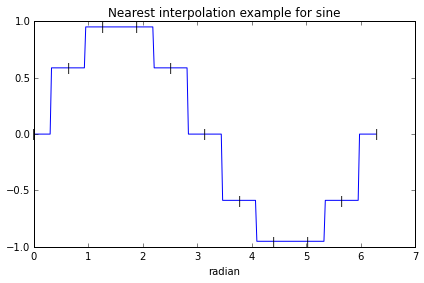

In [4]:
plot(x.list,yN.list)
for i in range(x0.length):
    text(x0[i],y0[i],'|',verticalalignment='center',horizontalalignment='center')
title('Nearest interpolation example for sine')
xlabel('radian')
tight_layout()

Plot the results for *nearest* example.

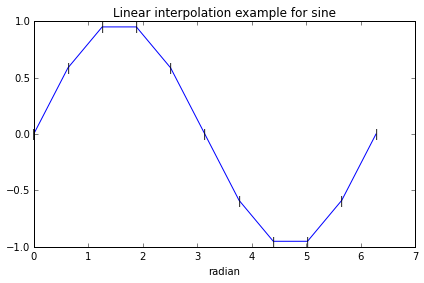

In [5]:
plot(x.list,yL.list)
for i in range(x0.length):
    text(x0[i],y0[i],'|',verticalalignment='center',horizontalalignment='center')
title('Linear interpolation example for sine')
xlabel('radian')
tight_layout()